MNIST 예제 (CNN모델 예제)

In [16]:
# 1. 필요한 라이브러리 임포트
import tensorflow as tf # 딥러닝 라이브러리
from tensorflow.keras import layers, models # 신경망 계층 및 모델 설계
from tensorflow.keras.datasets import mnist # MNISt 데이터셋
import matplotlib.pyplot as plt # 시각화 도구

# 폰트 지정
plt.rcParams['font.family'] = ('Malgun Godic')

In [17]:
# 2. 데이터 로드 및 전처리
# MINIST 데이터셋은 이미 나뉘어 제공 (학습 /테스트 데이터)
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [ ]:
# 정규화 : MNIST 이미지는 28X28 크기, (흑백 이미지는 채널 1개, 컬러는 3개)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255.0 # 0~1로 정규화, 픽셀은 0에서 255까지
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255.0

In [19]:
# 레이블을 One-Hot Encoding (숫자 0~9를 벡터로 변환)
# One-Hot Encoding : 범주형 데이터를 수치형 데이터로 변환하는 방법
if len(y_train.shape) == 1: # shape이 (n,)인지 확인
    y_train = tf.keras.utils.to_categorical(y_train, 10) # to_categorical(원핫인코딩 대상, 클래스 갯수)
if len(y_test.shape) ==1: 
    y_test = tf.keras.utils.to_categorical(y_test, 10)

In [20]:
# 3. CNN 모델 정의
model = models.Sequential()  # 순차적 모델 선언

In [21]:
# 첫 번째 합성곱 계층 : 필터 크기 3x3 , 필터 수 32, 활성화 함수 ReLU
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# 풀링 계층 : 2x2 크기로 다운샘플링
model.add(layers.MaxPooling2D((2,2)))

c:\ai_files\dl_Study\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# 두 번째 합성곱 계층 : 필터 수 64
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [23]:
# 세 번째 합성곱 계층 : 필터 수 64
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [25]:
# Fully Connected Layer를 연결하기 위해 Flatten 처리
model.add(layers.Dense(64, activation='relu'))

In [26]:
# 출력층: 뉴런 수 10(클래스 수), 활성화 함수 Softmax
model.add(layers.Dense(10, activation='softmax'))

In [27]:
# 모델 요약 출력 (구조 확인용)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3, 3, 64)       │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3, 3, 10)       │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,554 (236.54 KB)

 Trainable params: 60,554 (236.54 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# 4. 모델 컴파일
model.compile(optimizer='adam',               # 최적화 알고리즘 (손실값을 최소화하면서 모델이 최적의 가중치를 찾도록 안내하는 역할)
              loss='categorical_crossentropy', # 다중 클래스 분류 손실 함수
              metrics=['accuracy'])           # 평가 지표: 정확도

In [29]:
# 6. 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"테스트 정확도: {test_acc:.4f}")

ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 10), output.shape=(None, 3, 3, 10)

In [30]:
# 7. 결과 확인: 테스트 데이터에서 임의의 이미지 예측
import numpy as np

In [31]:
# 테스트 데이터에서 첫 번째 샘플을 가져옴
sample_image = x_test[0]   # 첫번 째 이미지 저장
sample_label = np.argmax(y_test[0])   # y_test[0] 배열에서 가장 큰 값을 가지는 요소의 인덱스를 찾아 sample_label 변수에 저장

In [32]:
# 모델로 예측 수행
predicted_label = np.argmax(model.predict(sample_image.reshape(1, 28, 28, 1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


findfont: Font family 'Malgun Godic' not found.
findfont: Font family 'Malgun Godic' not found.
findfont: Font family 'Malgun Godic' not found.
findfont: Font family 'Malgun Godic' not found.
findfont: Font family 'Malgun Godic' not found.
findfont: Font family 'Malgun Godic' not found.
findfont: Font family 'Malgun Godic' not found.
findfont: Font family 'Malgun Godic' not found.
findfont: Font family 'Malgun Godic' not found.
findfont: Font family 'Malgun Godic' not found.
findfont: Font family 'Malgun Godic' not found.
findfont: Font family 'Malgun Godic' not found.
findfont: Font family 'Malgun Godic' not found.
findfont: Font family 'Malgun Godic' not found.
findfont: Font family 'Malgun Godic' not found.
findfont: Font family 'Malgun Godic' not found.
findfont: Font family 'Malgun Godic' not found.
findfont: Font family 'Malgun Godic' not found.
findfont: Font family 'Malgun Godic' not found.
findfont: Font family 'Malgun Godic' not found.
findfont: Font family 'Malgun Godic' not

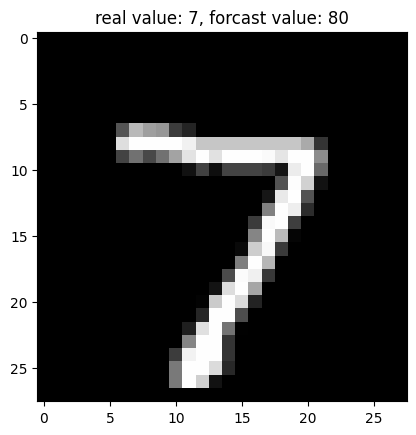

In [33]:
# 결과 출력
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"real value: {sample_label}, forcast value: {predicted_label}")
plt.show()